In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
assortment_df = pd.read_csv("data/assortment.csv",
                            dtype={"product_id": str,
                                   "product_group": str,
                                   })

orders_df = pd.read_csv("data/orders.csv",
                        parse_dates=['datetime'])

## Distribution of Number of Products in Orders

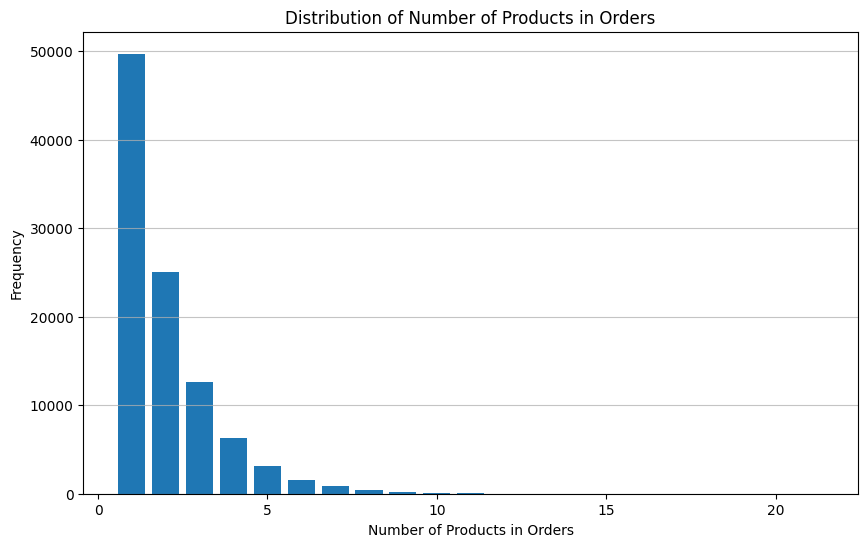

In [3]:
order_product_counts = orders_df.groupby('order_id')['product_id'].count()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(order_product_counts, bins=range(1, order_product_counts.max() + 1), align='left', rwidth=0.8)
plt.xlabel('Number of Products in Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products in Orders')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Count the Number of Orders per Product

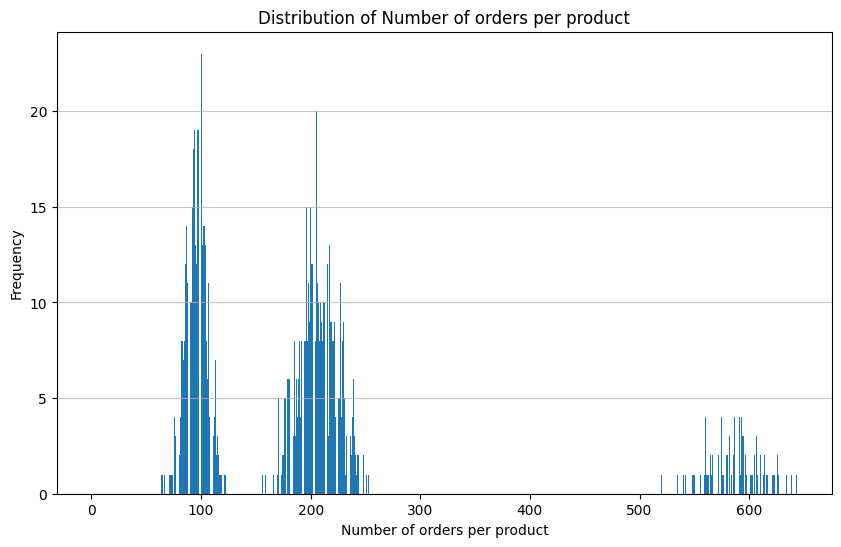

In [4]:
# count the number of orders per product
orders_per_product = orders_df.groupby('product_id')['order_id'].count()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(orders_per_product, bins=range(1, orders_per_product.max() + 1), align='left', rwidth=0.8)
plt.xlabel('Number of orders per product')
plt.ylabel('Frequency')
plt.title('Distribution of Number of orders per product')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Find Clusters that Sold Together Frequently 

In [5]:
# Merge the DataFrames on the 'product_id' column
merged_df = pd.merge(orders_df, assortment_df, on='product_id', how='left')


# Sort the DataFrame by 'order_id' and 'cluster'
df_sorted = merged_df.sort_values(by=['order_id', 'cluster'])

# Group by 'order_id' and aggregate the 'cluster' values into lists
grouped_orders = df_sorted.groupby('order_id')['cluster'].agg(list)

# Count the frequency of cluster pairs being sold together
cluster_pair_counts = {}
for clusters in grouped_orders:
    if len(clusters) > 1:
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                pair = (clusters[i], clusters[j])
                cluster_pair_counts[pair] = cluster_pair_counts.get(pair, 0) + 1

# Convert the dictionary of cluster pairs and frequencies to a DataFrame
cluster_frequency_df = pd.DataFrame(list(cluster_pair_counts.items()), columns=['cluster_pair', 'frequency'])

# Split the 'cluster_pair' column into two separate columns 'cluster1' and 'cluster2'
cluster_frequency_df[['cluster1', 'cluster2']] = pd.DataFrame(cluster_frequency_df['cluster_pair'].tolist(), index=cluster_frequency_df.index)

# Drop the original 'cluster_pair' column
cluster_frequency_df = cluster_frequency_df.drop(columns=['cluster_pair'])

# Sort the DataFrame by frequency in descending order
cluster_frequency_df = cluster_frequency_df.sort_values(by='frequency', ascending=False)



In [6]:
cluster_frequency_df

,frequency,cluster1,cluster2
1,30828,garden,toys
0,29143,clothes,toys
3,27816,toys,winter
2,27728,garden,winter
6,19194,clothes,garden
7,17421,clothes,winter
5,15730,garden,garden
8,14796,toys,toys
4,13013,winter,winter
9,5651,clothes,clothes


In [7]:
# Total sales at the cluster level
total_sales_cluster = merged_df.groupby('cluster').size().reset_index(name='total_sales')

# Total sales at the product group level
total_sales_product_group = merged_df.groupby('product_group').size().reset_index(name='total_sales')

In [8]:
# Display the total sales at the cluster level
print("Total Sales at Cluster Level:")
total_sales_cluster.sort_values(by='total_sales', ascending=False)

Total Sales at Cluster Level:


,cluster,total_sales
2,toys,58748
1,garden,54284
3,winter,49308
0,clothes,38339


In [9]:
# Count the number of items from each cluster
items_per_cluster = assortment_df.groupby('cluster').size().reset_index(name='items_count_cluster')

# Count the number of items from each product group
items_per_product_group = assortment_df.groupby('product_group').size().reset_index(name='items_count_product_group')


In [10]:
# Display the number of items from each cluster
print("Items per Cluster:")
items_per_cluster

Items per Cluster:


,cluster,items_count_cluster
0,clothes,400
1,garden,250
2,toys,100
3,winter,250
